In [2]:
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

In [3]:
timeslice = []
corpus = ''
for ano in ['2013','2014','2015','2016','2017']:
    f = open('../../datasets/artigos/preprocessed/'+ano+'/artigosPre.txt','r')
    artigos = f.read()
    f.seek(0)
    timeslice.append(len(f.readlines()))
    corpus += artigos
open('new_corpus.txt','w').write(corpus)

640155

# Treinando base W2V

In [52]:
from gensim.models import Word2Vec
from gensim.models import Phrases

In [35]:
corpus = [i.split() for i in open('new_corpus.txt','r').read().split('\n')]

In [53]:
bigram = Phrases(corpus)

In [56]:
model = Word2Vec(bigram[corpus], size=100, window=5, min_count=1, workers=4)

In [57]:
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [44]:
f = open('../acm_words.txt','r')
acm_words = f.read().replace('\n',' ').split()

In [90]:
word_vectors = model.wv
vectors = model.wv.vectors
vector_size = model.wv.vector_size
index2word = model.wv.index2word

In [102]:
f = open('l2v.vec','w')
f.writelines("{} {}\n".format(len(index2word),vector_size))

for idx,i in enumerate(index2word):
    f.writelines("{} {}\n".format(i," ".join(str(e) for e in vectors[idx])))

In [89]:
word_vectors.__dict__

{'vectors': array([[-3.46034110e-01,  4.33460921e-02,  5.10073602e-01, ...,
         -5.07826269e-01,  8.92133236e-01,  4.40165550e-01],
        [-3.75249505e-01,  4.76513728e-02,  5.55313051e-01, ...,
         -5.41769564e-01,  9.53062892e-01,  4.77546483e-01],
        [-3.48000616e-01,  3.39916609e-02,  5.05969048e-01, ...,
         -5.03322721e-01,  8.64033043e-01,  4.31663036e-01],
        ...,
        [-2.49737781e-03,  2.06955563e-04,  1.05238277e-02, ...,
         -1.09885344e-02,  1.35224964e-02,  1.02521330e-02],
        [-3.34439776e-03,  2.86710286e-03,  1.08749885e-02, ...,
         -1.09593216e-02,  1.48273008e-02,  5.21046622e-03],
        [-6.51153084e-03, -7.79322349e-04,  1.26109375e-02, ...,
         -9.63223167e-03,  1.38051473e-02,  8.99915304e-03]], dtype=float32),
 'vocab': {'privacy': <gensim.models.keyedvectors.Vocab at 0x7f8272ab6588>,
  'security': <gensim.models.keyedvectors.Vocab at 0x7f8272ab6630>,
  'issue': <gensim.models.keyedvectors.Vocab at 0x7f8272ab6

In [49]:
len(set(model.wv.vocab.keys()).intersection(set(acm_words)))

829

# LDA seq

In [23]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(open('new_corpus.txt','r'))
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print(words_freq)
indices = np.arange(len(words_freq))

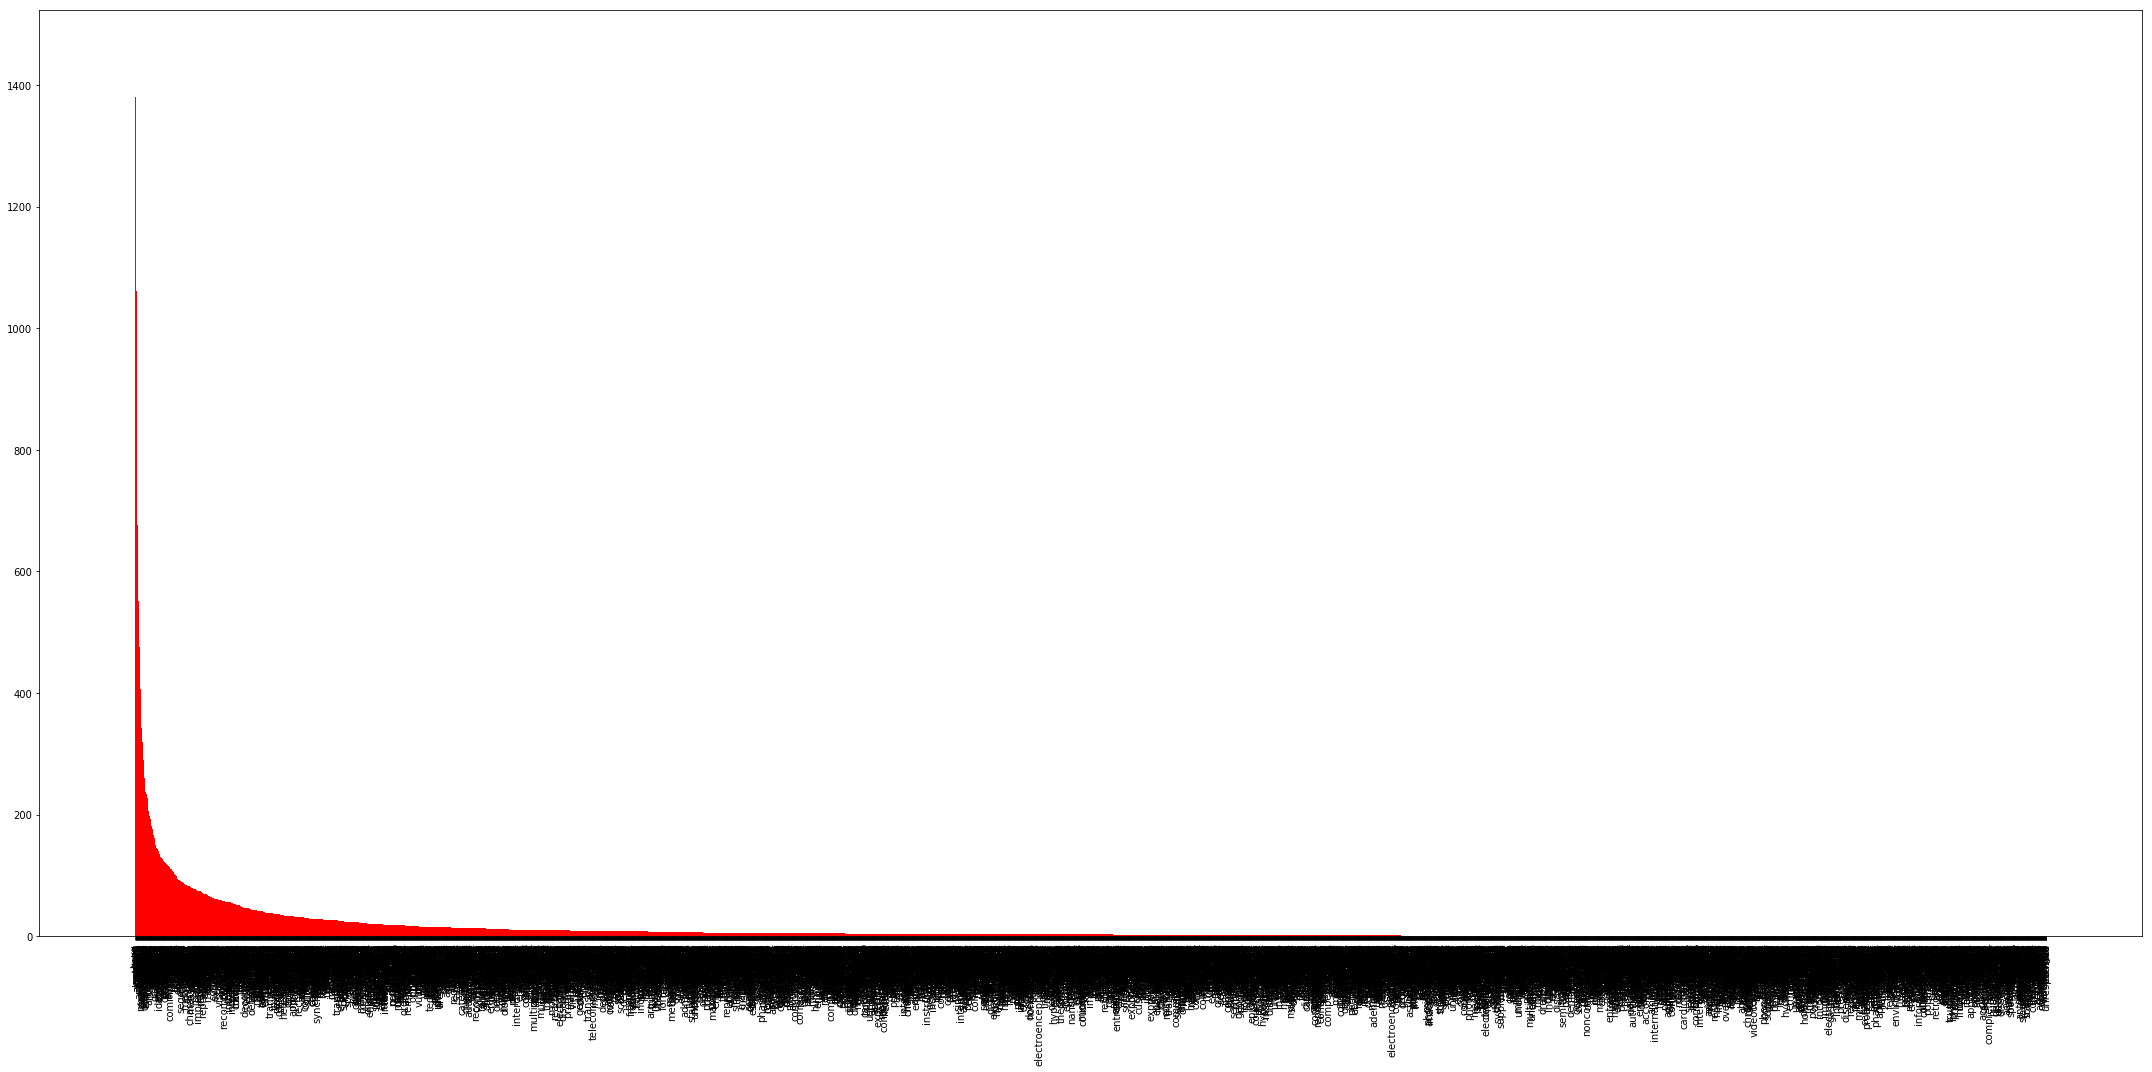

In [26]:
%matplotlib inline

word = []
frequency = []
for i in range(len(words_freq)):
    word.append(words_freq[i][0])
    frequency.append(words_freq[i][1])
plt.figure(figsize=(30, 15))
plt.bar(indices,frequency,width =1, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()


In [27]:
f = open('../acm_words.txt','r')
acm_words = f.read().replace('\n',' ').split()

In [28]:
stop_words_without_acm_words = list(set(word) - set(acm_words))

In [56]:
art = [[a for a in artigo.split() if a not in stop_words_without_acm_words] for artigo in corpus.split('\n')]
id2word = Dictionary(art)

In [60]:
corpus = [id2word.doc2bow(artigo) for artigo in art]

In [10]:
timeslice

[2133, 2184, 2335, 2392, 2226]

In [61]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=id2word, time_slice=timeslice, num_topics=5)

/home/leandror/.local/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/home/leandror/.local/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)
/home/leandror/.local/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/home/leandror/.local/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/home/leandror/.local/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((

In [66]:
ldaseq.print_topics(time=3)


[[('network', 0.058973367522171985),
  ('system', 0.04027892815185393),
  ('time', 0.03556821254183499),
  ('base', 0.029995807811917102),
  ('application', 0.0267101685172188),
  ('cloud', 0.025484596947009084),
  ('service', 0.024717505159130005),
  ('energy', 0.02403373499059921),
  ('evaluation', 0.022768810470356202),
  ('performance', 0.02265392309140208),
  ('use', 0.022357386793113547),
  ('environment', 0.02036360290038232),
  ('design', 0.01934034737201551),
  ('model', 0.01863747663797879),
  ('control', 0.01580394323764535),
  ('architecture', 0.015726681563271738),
  ('computer', 0.01260055093613787),
  ('management', 0.012362286287566972),
  ('analysis', 0.011582975756926088),
  ('logic', 0.010448992143094615)],
 [('analysis', 0.06008627447190781),
  ('algorithm', 0.059121244141991554),
  ('model', 0.04407511278212022),
  ('optimization', 0.042639960257978594),
  ('use', 0.03895465198487706),
  ('base', 0.028840250071198094),
  ('test', 0.0200055033345255),
  ('system', 0

In [64]:
ldaseq.print_topic_times(topic=1) # evolution of 1st topic


[[('algorithm', 0.05787007060675564),
  ('analysis', 0.05710593292658221),
  ('optimization', 0.042406132163768186),
  ('model', 0.04004122903613215),
  ('use', 0.039377488226159316),
  ('base', 0.028068597790956266),
  ('test', 0.020314664332349484),
  ('system', 0.019747446801527797),
  ('simulation', 0.01854580139143725),
  ('flow', 0.01659850854089113),
  ('design', 0.015682724483463365),
  ('activity', 0.014242678753631145),
  ('power', 0.013229159013215345),
  ('distribution', 0.013085155143147821),
  ('state', 0.011349250002767533),
  ('estimation', 0.010866669213024139),
  ('location', 0.010514723169051358),
  ('genetic', 0.010017625369804365),
  ('generation', 0.009339349276769666),
  ('level', 0.009144261854134915)],
 [('algorithm', 0.05831734009691285),
  ('analysis', 0.05759724514839059),
  ('optimization', 0.04250415236959076),
  ('model', 0.04004184770987583),
  ('use', 0.03931200558298236),
  ('base', 0.02778926153409248),
  ('test', 0.02026935131056114),
  ('system', 0.